In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
banking = pd.read_csv('dataset/banking_dirty.csv', index_col = 'Unnamed: 0')

In [7]:
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [4]:
banking.shape

(100, 12)

In [5]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   cust_id           100 non-null    object 
 2   birth_date        100 non-null    object 
 3   Age               100 non-null    int64  
 4   acct_amount       100 non-null    float64
 5   inv_amount        100 non-null    int64  
 6   fund_A            100 non-null    float64
 7   fund_B            100 non-null    float64
 8   fund_C            100 non-null    float64
 9   fund_D            100 non-null    float64
 10  account_opened    100 non-null    object 
 11  last_transaction  100 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB


### Data tidak seragam

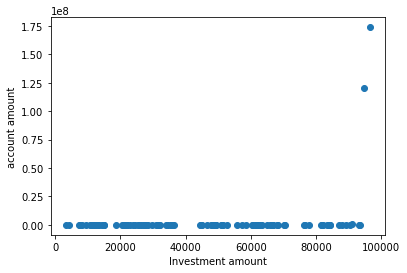

In [22]:
plt.scatter(x = 'inv_amount', y = 'acct_amount', data = banking)
plt.ylabel('account amount')
plt.xlabel('Investment amount')
#plt.yscale('log')
plt.show();

In [24]:
banking[banking['acct_amount'] > 25000000]

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
61,45F31C81,1975-01-12,49,1.206753e+08,94608,15416.0,18845.0,20325.0,40022.0,05-11-18,25-12-19
75,8B359102,1974-08-16,46,1.737431e+08,96614,18634.0,1763.0,75499.0,718.0,04-06-18,20-06-19


#### datetime tidak seragam

In [29]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                       infer_datetime_format = True,
                                       # error jika baris gagal di konversi
                                        errors = 'coerce')

### Cross field validation

In [36]:
sum_fund = banking[['fund_A','fund_B','fund_C','fund_D']].sum(axis = 1)

In [51]:
check_inv_amount = banking['inv_amount'] == sum_fund
check_inv_amount.value_counts()

True     92
False     8
dtype: int64

In [52]:
# data tidak konsisten
inconsistent_inv = banking[~check_inv_amount]
inconsistent_inv

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
4,7A73F334,1990-05-17,30,120512.00,93230,12158.40,51281.00,13434.00,18383.00,2018-05-14,2018-07-19
12,EEBD980F,1990-11-20,34,57838.49,50812,18314.00,1477.00,29049.48,5539.00,2018-08-12,2020-04-01
22,96525DA6,1992-11-23,28,82511.24,33927,8206.00,15019.00,5559.60,6182.00,2018-07-23,2018-07-08
43,38B8CD9C,1970-06-25,50,28834.71,27531,314.00,6072.28,14163.00,7908.00,2018-09-17,2020-05-02
47,68C55974,1962-07-08,58,95038.14,66796,33764.00,5042.00,10659.00,19237.41,2018-03-04,2018-09-25
65,0A9BA907,1966-09-21,54,90469.53,70171,28615.00,21720.05,11906.00,10763.00,2018-06-15,2018-08-28
89,C580AE41,1968-06-01,52,96673.37,68466,8489.36,28592.00,2439.00,30419.00,2018-09-28,2018-09-17
92,A07D5C92,1990-09-20,30,99577.36,60407,6467.00,20861.00,9861.00,26004.16,2017-11-17,2020-01-16


#### cek umur

In [45]:
tahun_2020 = dt.date(2020, 1, 11)

In [48]:
age_manual = tahun_2020.year - banking['birth_date'].dt.year

In [50]:
check_age = age_manual == banking['Age']
check_age.value_counts()

True     92
False     8
dtype: int64

In [54]:
# data tidak konsisten
inconsistent_age = banking[~check_age]
inconsistent_age

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
2,BFC13E88,1990-09-12,34,5.986377e+04,24567,10323.0,4590.0,8469.00,1185.0,2018-04-25,2018-02-04
8,E52D4C7F,1975-06-05,49,6.179589e+04,49385,12939.0,7757.0,12569.00,16120.0,2017-05-22,2019-10-24
12,EEBD980F,1990-11-20,34,5.783849e+04,50812,18314.0,1477.0,29049.48,5539.0,2018-08-12,2020-04-01
23,A1815565,1968-09-27,56,8.299604e+04,30897,16092.0,5491.0,5098.00,4216.0,2017-07-11,2019-09-30
32,8D08495A,1961-08-14,63,8.913852e+04,60795,53880.0,1325.0,2105.00,3485.0,2018-08-08,2019-05-02
54,2F4F99C1,1988-12-19,36,8.205848e+04,35758,6129.0,16840.0,10397.00,2392.0,2018-12-30,2018-11-08
61,45F31C81,1975-01-12,49,1.206753e+08,94608,15416.0,18845.0,20325.00,40022.0,2018-05-11,2019-12-25
85,7539C3B7,1974-05-14,50,1.077557e+06,91190,32692.0,30405.0,14728.00,13365.0,2017-08-23,2019-07-06


### Missing Data

In [ ]:
# rangkum missing data:
banking.isna().sum()

In [ ]:
# visualizing missing data
import missingno as msno
msno.matrix(banking)
plt.show();

In [ ]:
# kelompok missing dan complete value
missing = banking[banking['inv_amount'].isna()]
complete = banking[~banking['inv_amount'].isna()]

In [ ]:
# cek summary
missing.describe()

In [ ]:
complete.describe()